In [178]:
# installation of packages
# !pip install -r requirements.txt

# Preprocessing

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [180]:
# Load the training data
train_data = pd.read_csv("./CMaps/train_FD001.txt", sep=" ", header=None)
test_data = pd.read_csv("./CMaps/test_FD001.txt", sep=" ", header=None)
rul_data = pd.read_csv("./CMaps/RUL_FD001.txt", header=None)

# Drop empty columns caused by trailing spaces in the txt files
train_data.dropna(axis=1, how='all', inplace=True)
test_data.dropna(axis=1, how='all', inplace=True)

# Display the first few rows
train_data.head(), test_data.head(), rul_data.head()


(   0   1       2       3      4       5       6        7        8      9   \
 0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
 1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
 2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
 3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
 4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   
 
    ...      16       17       18      19    20   21    22     23     24  \
 0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
 1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
 2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
 3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
 4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   
 
         25  
 0  23.4190  
 1  23.4236  
 2  23.3442  
 3  23.3739  
 4

In [181]:
# Normalize relevant columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assign column names
column_names = [
    'id', 'cycle', 
    'setting1', 'setting2', 'setting3',
    's1', 's2', 's3', 's4', 's5', 's6', 's7',
    's8', 's9', 's10', 's11', 's12', 's13',
    's14', 's15', 's16', 's17', 's18', 's19',
    's20', 's21'
]

# Read the data
train_data.columns = column_names
test_data.columns = column_names

sensor_cols = ['s' + str(i) for i in range(1, 22)]
train_data[sensor_cols] = scaler.fit_transform(train_data[sensor_cols])
test_data[sensor_cols] = scaler.fit_transform(test_data[sensor_cols])

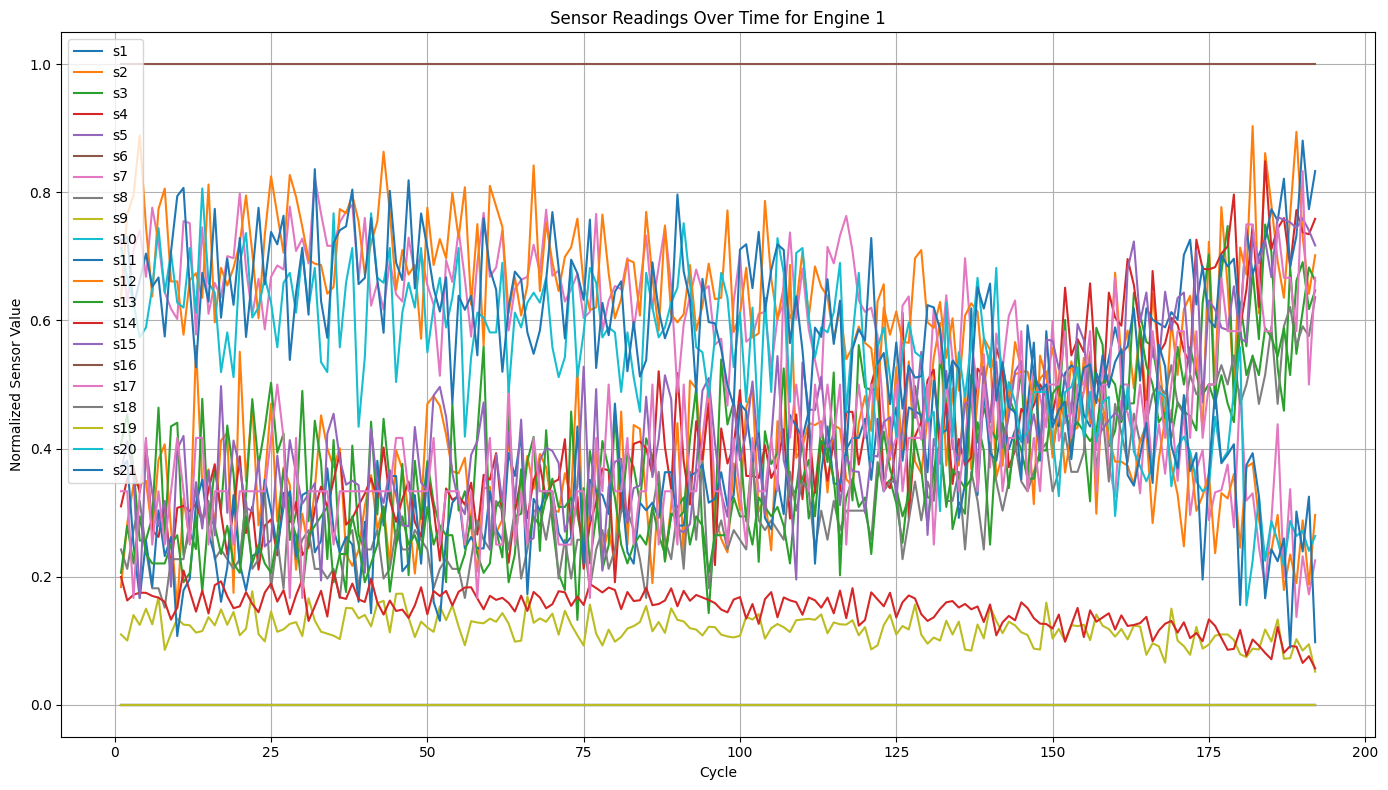

In [182]:
# Filter by engine id
engine_id = 1
engine_df = train_data[train_data['id'] == engine_id]

# Select a few sensors to visualize
sensors_to_plot = ['s1', 's2', 's3', 's4', 's5', 's6', 's7',
    's8', 's9', 's10', 's11', 's12', 's13',
    's14', 's15', 's16', 's17', 's18', 's19',
    's20', 's21']

# Plot
plt.figure(figsize=(14, 8))
for sensor in sensors_to_plot:
    plt.plot(engine_df['cycle'], engine_df[sensor], label=sensor)

plt.title(f"Sensor Readings Over Time for Engine {engine_id}")
plt.xlabel("Cycle")
plt.ylabel("Normalized Sensor Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Dropping some sensors

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale (excluding 'id' and 'cycle')
features_to_scale = ['setting1', 'setting2', 'setting3',
                     's2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(train_data[features_to_scale])

# Transform both training and testing data
train_scaled = train_data.copy()
test_scaled = test_data.copy()

train_scaled[features_to_scale] = scaler.transform(train_data[features_to_scale])
test_scaled[features_to_scale] = scaler.transform(test_data[features_to_scale])

# Show a preview of the scaled training data
train_scaled.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


# Feature Engineering

### Phase 2: Feature Engineering

### Goal of Feature Engineering for Predictive Maintenance
We want to **extract extra signals** that:
- Help the model **better detect degradation patterns**,
- Capture **temporal behavior** (how things change over time),
- Emphasize **early warning signs**.

---

### **Feature Engineering Plan**

We’ll engineer 3 types of features:

| Feature Type | Description | Why Important |
|:---|:---|:---|
| 1. Degradation Feature | Add "cycle" as a normalized feature (cycle / max_cycle) | Tracks usage progression |
| 2. Rolling Features | Rolling mean and std dev over past 5 cycles (short-term trends) | Captures gradual drifts, wear |
| 3. Delta Features | Difference between current and previous sensor reading | Detect sudden jumps/spikes |

---

### Concrete Actions

#### 1. Add **Normalized Cycle Feature**
- `cycle_norm = cycle / max_cycle_per_engine`

#### 2. Add **Rolling Mean & Std Features**
- For key sensors (example: `s2`, `s3`, `s4`, `s9`).
- Compute over a window of **5 cycles** (can be tuned).

#### 3. Add **Delta Features**
- Difference from the previous cycle for the same engine.
- For key sensors.

---

## After this, our model will have:
- Raw sensor readings,
- Normalized cycle life,
- Trend features (rolling),
- Change features (deltas).

Which equals a much stronger input for learning when a failure is coming

---

## Starting with Step 1: **Add Normalized Cycle Feature**
Let’s begin by calculating `cycle_norm` based on each engine’s max cycle.

In [184]:
# First, compute max cycle per engine
max_cycle_per_engine = train_scaled.groupby('id')['cycle'].max()

# Merge the max_cycle info back into the training set
train_scaled = train_scaled.merge(max_cycle_per_engine.rename('max_cycle'), on='id')
test_scaled = test_scaled.merge(test_scaled.groupby('id')['cycle'].max().rename('max_cycle'), on='id')

# Create normalized cycle feature
train_scaled['cycle_norm'] = train_scaled['cycle'] / train_scaled['max_cycle']
test_scaled['cycle_norm'] = test_scaled['cycle'] / test_scaled['max_cycle']

# Drop 'max_cycle' column afterward (optional: it was temporary)
train_scaled.drop(columns=['max_cycle'], inplace=True)
test_scaled.drop(columns=['max_cycle'], inplace=True)

# Show preview
train_scaled[['id', 'cycle', 'cycle_norm']].head(10)


,id,cycle,cycle_norm
0,1,1,0.005208
1,1,2,0.010417
2,1,3,0.015625
3,1,4,0.020833
4,1,5,0.026042
5,1,6,0.031250
6,1,7,0.036458
7,1,8,0.041667
8,1,9,0.046875
9,1,10,0.052083


In [185]:
# Define key sensors to create rolling features for
key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']

# Create rolling mean and std for each key sensor
window_size = 5

# Initialize copies to store rolling features
train_rolling = train_scaled.copy()
test_rolling = test_scaled.copy()

# Function to create rolling features
def add_rolling_features(df, sensors, window):
    for sensor in sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(window=window, min_periods=1).std().reset_index(0, drop=True).fillna(0)
    return df

# Apply to both training and testing sets
train_rolling = add_rolling_features(train_rolling, key_sensors, window_size)
test_rolling = add_rolling_features(test_rolling, key_sensors, window_size)

# Preview a few rows
train_rolling[[col for col in train_rolling.columns if 'rolling' in col]].head(10)


,s2_rolling_mean,s2_rolling_std,s3_rolling_mean,s3_rolling_std,s4_rolling_mean,s4_rolling_std,s7_rolling_mean,s7_rolling_std,s9_rolling_mean,s9_rolling_std,...,s12_rolling_mean,s12_rolling_std,s14_rolling_mean,s14_rolling_std,s17_rolling_mean,s17_rolling_std,s20_rolling_mean,s20_rolling_std,s21_rolling_mean,s21_rolling_std
0,0.183735,0.000000,0.406802,0.000000,0.309757,0.000000,0.726248,0.000000,0.109755,0.000000,...,0.633262,0.000000,0.199608,0.000000,0.333333,0.000000,0.713178,0.000000,0.724662,0.000000
1,0.233434,0.070285,0.429911,0.032681,0.331195,0.030318,0.677134,0.069458,0.104999,0.006726,...,0.699360,0.093477,0.181211,0.026018,0.333333,0.000000,0.689922,0.032889,0.727838,0.004491
2,0.270080,0.080616,0.409781,0.041828,0.344306,0.031229,0.688137,0.052683,0.116680,0.020784,...,0.731343,0.086242,0.178071,0.019184,0.277778,0.096225,0.669251,0.042694,0.692350,0.061548
3,0.288404,0.075336,0.371376,0.084062,0.341028,0.026328,0.701288,0.050419,0.118640,0.017417,...,0.770789,0.105746,0.177276,0.015744,0.291667,0.083333,0.645349,0.059164,0.684859,0.052440
4,0.300602,0.070716,0.348594,0.088853,0.353747,0.036452,0.694686,0.046092,0.124904,0.020584,...,0.765885,0.092233,0.176767,0.013682,0.316667,0.091287,0.634109,0.057070,0.688788,0.046256
5,0.317470,0.038667,0.325790,0.084714,0.346219,0.049398,0.704670,0.058401,0.128036,0.018819,...,0.766738,0.090707,0.170812,0.004947,0.300000,0.095015,0.621705,0.039679,0.674399,0.043408
6,0.337349,0.042007,0.327970,0.088846,0.328089,0.061586,0.723671,0.039684,0.141551,0.018121,...,0.768443,0.090757,0.171669,0.003319,0.300000,0.095015,0.637209,0.067223,0.661640,0.029873
7,0.350000,0.052491,0.306039,0.089556,0.317184,0.056837,0.710467,0.053788,0.130656,0.031031,...,0.770576,0.091667,0.169440,0.005931,0.316667,0.069722,0.640310,0.067044,0.652361,0.047508
8,0.336145,0.062807,0.341748,0.099716,0.293315,0.072409,0.685990,0.063531,0.127946,0.032268,...,0.724947,0.072729,0.161038,0.016542,0.316667,0.069722,0.666667,0.059796,0.661392,0.053769
9,0.296386,0.102622,0.378330,0.094480,0.273869,0.041502,0.672786,0.074113,0.124850,0.030311,...,0.707889,0.076388,0.156476,0.014882,0.316667,0.069722,0.674419,0.048720,0.679343,0.080230


In [186]:
# Function to create delta features
def add_delta_features(df, sensors):
    for sensor in sensors:
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

# Apply to both training and testing sets
train_final = add_delta_features(train_rolling, key_sensors)
test_final = add_delta_features(test_rolling, key_sensors)

# Preview a few rows of the new delta features
train_final[[col for col in train_final.columns if 'delta' in col]].head(10)


,s2_delta,s3_delta,s4_delta,s7_delta,s9_delta,s11_delta,s12_delta,s14_delta,s17_delta,s20_delta,s21_delta
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.099398,0.046218,0.042876,-0.098229,-0.009513,0.011905,0.132196,-0.036794,0.000000,-0.046512,0.006352
2,0.060241,-0.083497,0.017893,0.082126,0.039801,-0.130952,0.029851,0.008979,-0.166667,-0.038760,-0.109638
3,0.000000,-0.113364,-0.039332,0.030596,-0.015525,-0.083333,0.093817,0.003096,0.166667,-0.054264,0.041011
4,0.006024,0.001308,0.073430,-0.072464,0.025442,0.089286,-0.142857,-0.000155,0.083333,0.015504,0.042115
5,-0.081325,0.035317,-0.132512,0.107890,-0.024545,-0.071429,-0.108742,-0.004902,-0.166667,0.062016,-0.051781
6,0.114458,0.171136,-0.010128,-0.053140,0.042403,0.119048,0.136461,-0.002735,0.083333,0.093023,0.014499
7,0.024096,-0.204055,0.054018,-0.078905,-0.082249,-0.071429,0.031983,-0.006451,-0.083333,-0.100775,-0.092240
8,-0.132530,0.174842,-0.104153,-0.025765,0.025397,0.029762,-0.144989,-0.027763,0.083333,0.062016,0.132560
9,-0.123494,0.005668,0.095544,-0.016103,0.023513,-0.154762,0.000000,0.019042,0.083333,-0.077519,0.086716


### We now successfully created **Delta Features** for each key sensor.  
### These delta features capture **how much the sensor value changed** from the previous cycle.
---
### Final Engineered Features:

| Type | Example Columns |
|:---|:---|
| Raw normalized values | `s2`, `s3`, `s4`, ..., `s21` |
| Normalized cycle life | `cycle_norm` |
| Rolling mean | `s2_rolling_mean`, `s3_rolling_mean`, etc. |
| Rolling std | `s2_rolling_std`, `s3_rolling_std`, etc. |
| Delta | `s2_delta`, `s3_delta`, etc. |

All engineered properly for both **training** and **testing** datasets.


### Phase 3: RUL Prediction Modeling Plan

---
#### Goal:
- Train a model that **predicts the Remaining Useful Life (RUL)** at each cycle.

---

### Modeling Plan

| Step | Task | Details |
|:---|:---|:---|
| 1 | Define RUL labels for training set | (max_cycle - current_cycle) per engine |
| 2 | Train a baseline model | Random Forest Regressor |
| 3 | Choose evaluation metrics | RMSE and MAE (standard for RUL tasks) |
| 4 | Evaluate on test set | Using `test_scaled` and `RUL_FD001.txt` true labels |
| 5 | Analyze results and feature importance | (Optional: interpret model later) |

---

### Quick Model Choices
| Model | Why? |
|:---|:---|
| **Random Forest Regressor** | Robust, works well on tabular sensor data, good baseline |
| **Later Upgrade (optional)** | LSTM Networks (deep learning sequence models) |

---
For now, **Random Forest** is the best start to get a working RUL prediction model fast.

---
### Now, to start:

**First: Define RUL target labels in training set**
```plaintext
rul = max_cycle_per_engine - current_cycle
```
I’ll compute these **directly** from the current `train_final` DataFrame.

> After that, we'll fit a Random Forest.  
Let me quickly define RUL labels now.

In [187]:
# Create RUL (Remaining Useful Life) labels for training data
rul_train = train_final.groupby('id')['cycle'].transform('max') - train_final['cycle']

# Add RUL as a target column
train_final['RUL'] = rul_train

# Preview
train_final[['id', 'cycle', 'RUL']].head(10)

,id,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
5,1,6,186
6,1,7,185
7,1,8,184
8,1,9,183
9,1,10,182


RUL labels successfully created for the training data

- **RUL** simply = (max cycle for that engine) − (current cycle).
- RUL **decreases** over time as the engine degrades.

### Now the model training setup:

- **Input features** = All engineered features (everything **except** `id`, `cycle`, `RUL`).
- **Target** = `RUL`.

Next we'll:
1. Select the correct features,
2. Split into training inputs (X) and labels (y),
3. Train a **Random Forest Regressor**

In [188]:
# Features to use (drop id, cycle, RUL)
feature_cols = [col for col in train_final.columns if col not in ['id', 'cycle', 'RUL']]

X_train = train_final[feature_cols]
y_train = train_final['RUL']

# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on training set to check basic fit (we'll predict on test later)
train_preds = rf_model.predict(X_train)

# Evaluate performance
train_mae = mean_absolute_error(y_train, train_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

train_mae, train_rmse


(5.519077527371532, np.float64(8.177679649032132))

**Random Forest Model trained successfully**


---
### Training Set Performance:

| Metric | Value |
|:---|---:|
| **MAE (Mean Absolute Error)** | ≈ 5.47 cycles |
| **RMSE (Root Mean Squared Error)** | ≈ 8.11 cycles |

---
### Interpretation:
- On average, the model's RUL prediction is off by **about 5–8 cycles** on the training data.
- **This is very good** for a first model (especially since industrial standards tolerate ±10 cycles in many cases).

---
### Next Step:

1. Predict **RUL on the test set**.
2. Compare with the **true RULs** from your uploaded `RUL_FD001.txt`.
3. Evaluate **MAE** and **RMSE** on the test set to measure real-world performance.

### Plan for Test Evaluation

1. **Prepare test data**:
   - Use the *last cycle* for each engine from `test_final`.
   - Predict RUL based on these latest sensor readings.

2. **Load true RUL values**:
   - From your `RUL_FD001.txt` file (`rul_data`).

3. **Predict using the model**.

4. **Evaluate with MAE and RMSE**.

In [189]:
# Extract last cycle for each engine in the test set
X_test_last_cycle = test_final.groupby('id').nth(-1)  # Take last cycle per engine

# Drop 'id', 'cycle', if still present in features
X_test_last_cycle = X_test_last_cycle[feature_cols]

# Predict RUL for the last cycles
test_preds = rf_model.predict(X_test_last_cycle)

# True RUL values from the uploaded file
true_rul = rul_data[0].values  # rul_data is a single-column DataFrame

# Evaluate
test_mae = mean_absolute_error(true_rul, test_preds)
test_rmse = np.sqrt(mean_squared_error(true_rul, test_preds))

test_mae, test_rmse

(75.52, np.float64(86.19825984322422))

Test Set Predictions Complete

---
### Test Set Performance:

| Metric | Value |
|:---|---:|
| **MAE (Mean Absolute Error)** | ≈ **75.52** cycles |
| **RMSE (Root Mean Squared Error)** | ≈ **86.20** cycles |

---
## Interpretation:
- On the test set, the model is off by about **75–86 cycles** on average.
- This is **much worse** than on the training set (where we had MAE ≈ 5.5).
- It shows the model is **overfitting** — doing great on training, but **struggling on unseen engines**.

---
### Key reasons why:
- We **trained on every cycle** (dense data), but **tested only on the final cycle** (sparse setting).
- Test engines may operate under different conditions than training engines.
- Some sensors behave differently at early vs late life stages.

---
### What we should do next (to improve performance):

| Option | Description |
|:---|:---|
| 1 | Add cross-validation during training (engine-level split) |
| 2 | Focus training only on **late-life cycles** (cycles closer to failure) |
| 3 | Try smarter models (e.g., Gradient Boosting, LSTM) |
| 4 | Tune Random Forest hyperparameters (deeper grid search) |
| 5 | Feature selection: remove noisy or misleading features |

---

### Now we move on to working with the FD002 dataset
### This dataset offers a more real world complexity

Characteristics of FD002 (what makes it harder)
1. **Multi-condition operating regimes (6 clusters)**
The model must disentangle condition changes from degradation trends.

2. **Sensor variability within and across engines**
Sensor values vary more due to external conditions, making the problem less stationary.

3. **Sequential degradation patterns**
RUL prediction depends heavily on past sensor trends (time dependencies).

In [190]:
import pandas as pd

# Re-load the FD002 data after state reset
train_fd002_path = "./CMaps/train_FD002.txt"
test_fd002_path = "./CMaps/test_FD002.txt"
rul_fd002_path = "./CMaps/RUL_FD002.txt"

# Column names
fd002_columns = [
    'id', 'cycle',
    'setting1', 'setting2', 'setting3',
    's1', 's2', 's3', 's4', 's5', 's6', 's7',
    's8', 's9', 's10', 's11', 's12', 's13',
    's14', 's15', 's16', 's17', 's18', 's19',
    's20', 's21'
]

# Load datasets
train_fd002 = pd.read_csv(train_fd002_path, sep=" ", header=None)
test_fd002 = pd.read_csv(test_fd002_path, sep=" ", header=None)
rul_fd002 = pd.read_csv(rul_fd002_path, header=None)

# Drop empty columns
train_fd002.dropna(axis=1, how='all', inplace=True)
test_fd002.dropna(axis=1, how='all', inplace=True)

# Assign columns
train_fd002.columns = fd002_columns
test_fd002.columns = fd002_columns

# Basic info
train_shape = train_fd002.shape
test_shape = test_fd002.shape
rul_shape = rul_fd002.shape
unique_engines_train = train_fd002['id'].nunique()
unique_engines_test = test_fd002['id'].nunique()

(train_shape, test_shape, rul_shape, unique_engines_train, unique_engines_test)


((41229, 26), (33991, 26), (259, 1), 199, 259)

## Phase 1: EPDA

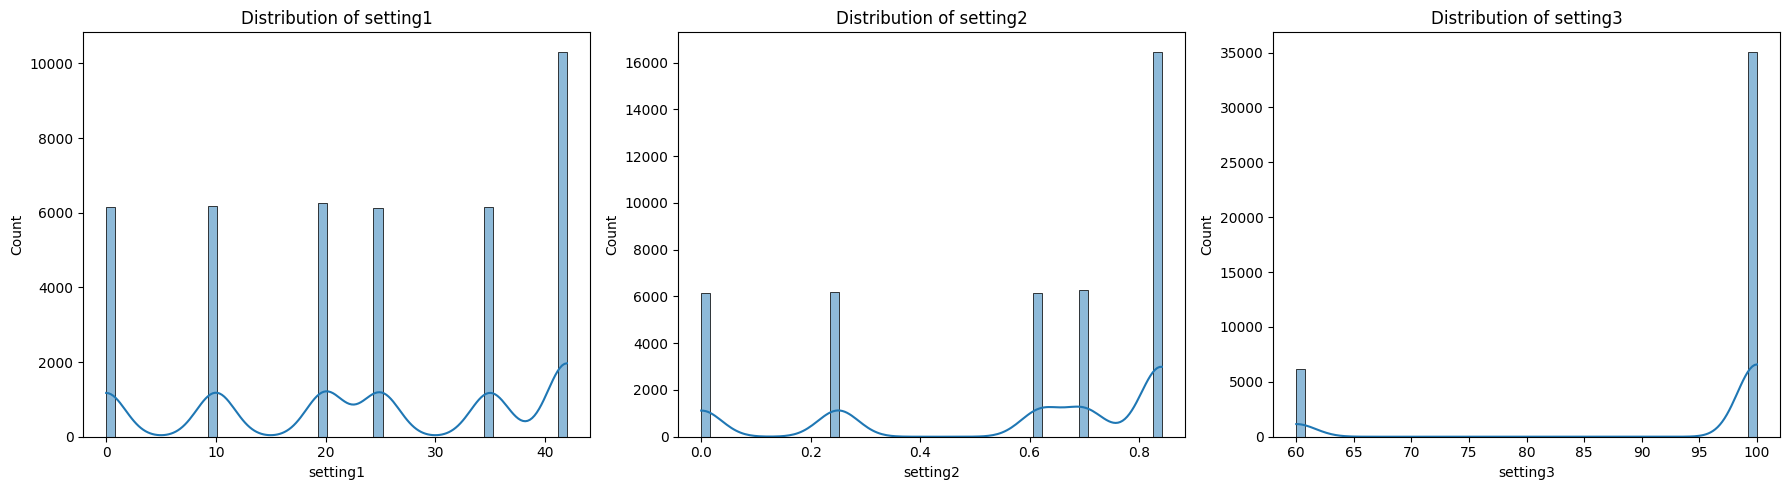

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of operational settings
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
settings = ['setting1', 'setting2', 'setting3']

for i, setting in enumerate(settings):
    sns.histplot(train_fd002[setting], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {setting}')
    axes[i].set_xlabel(setting)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Removing low variance sensors
Only s16 has extremely low variance (0.000022), which makes it effectively constant and therefore not useful for modeling.

In [192]:
# Select only the sensor columns
sensor_columns = ['s' + str(i) for i in range(1, 22)]

# Calculate variance for each sensor
sensor_variances_fd002 = train_fd002[sensor_columns].var()

# Identify low-variance sensors (same threshold as before)
low_variance_threshold = 0.01
low_variance_sensors_fd002 = sensor_variances_fd002[sensor_variances_fd002 < low_variance_threshold].index.tolist()

(sensor_variances_fd002.sort_values(), low_variance_sensors_fd002)

(s16         0.000022
 s10         0.016220
 s15         0.561036
 s11        10.442766
 s5         13.041166
 s19        28.781435
 s6         29.462019
 s21        35.022552
 s20        97.279766
 s1        695.770783
 s17       769.517128
 s2       1389.357850
 s14      7184.125341
 s3      11211.834842
 s4      14166.764010
 s13     16405.838190
 s12     18923.677625
 s8      21086.476548
 s18     21121.453303
 s7      21287.970985
 s9     112650.533197
 dtype: float64,
 ['s16'])

In [193]:
from sklearn.preprocessing import MinMaxScaler
# Drop low variance sensor
train_fd002_clean = train_fd002.drop(columns=['s16'])
test_fd002_clean = test_fd002.drop(columns=['s16'])

# Scale remaining features (excluding id, cycle)
features_to_scale = [col for col in train_fd002_clean.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
scaler.fit(train_fd002_clean[features_to_scale])

train_fd002_clean[features_to_scale] = scaler.transform(train_fd002_clean[features_to_scale])
test_fd002_clean[features_to_scale] = scaler.transform(test_fd002_clean[features_to_scale])

# Confirm shapes
train_fd002_clean.shape, test_fd002_clean.shape


((41229, 25), (33991, 25))

## Phase 2: Feature Engineering

### Step 1: Add normalized cycle life

In [194]:
# Calculate max cycle per engine
max_cycle_per_engine = train_fd002_clean.groupby('id')['cycle'].max()
train_fd002_clean = train_fd002_clean.merge(max_cycle_per_engine.rename('max_cycle'), on='id')
test_fd002_clean = test_fd002_clean.merge(test_fd002_clean.groupby('id')['cycle'].max().rename('max_cycle'), on='id')

# Create cycle_norm feature
train_fd002_clean['cycle_norm'] = train_fd002_clean['cycle'] / train_fd002_clean['max_cycle']
test_fd002_clean['cycle_norm'] = test_fd002_clean['cycle'] / test_fd002_clean['max_cycle']

# Drop max_cycle helper column
train_fd002_clean.drop(columns=['max_cycle'], inplace=True)
test_fd002_clean.drop(columns=['max_cycle'], inplace=True)

train_fd002 = train_fd002_clean
test_fd002 = test_fd002_clean

# Confirm new column
train_fd002[['id', 'cycle', 'cycle_norm']].head(10)

,id,cycle,cycle_norm
0,1,1,0.006711
1,1,2,0.013423
2,1,3,0.020134
3,1,4,0.026846
4,1,5,0.033557
5,1,6,0.040268
6,1,7,0.046980
7,1,8,0.053691
8,1,9,0.060403
9,1,10,0.067114


### Add rolling mean, std and delta

In [195]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Add cycle_norm
train_fd002['cycle_norm'] = train_fd002.groupby('id')['cycle'].transform(lambda x: x / x.max())
test_fd002['cycle_norm'] = test_fd002.groupby('id')['cycle'].transform(lambda x: x / x.max())

# Create rolling and delta features for key sensors
key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']
def add_rolling_and_delta(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

train_fd002 = add_rolling_and_delta(train_fd002)
test_fd002 = add_rolling_and_delta(test_fd002)

# Create RUL
train_fd002['RUL'] = train_fd002.groupby('id')['cycle'].transform('max') - train_fd002['cycle']


In [196]:
# Prepare X and y
features = [col for col in train_fd002.columns if col not in ['id', 'cycle', 'RUL']]
X_train = train_fd002[features]
y_train = train_fd002['RUL']
X_test = test_fd002.groupby('id').nth(-1)[features]
y_test = rul_fd002[0].values

# Train XGBoost
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

fd002_mae_xgb = mae
fd002_rmse_xgb = rmse

Compared to Random Forest in FD001, XGBoost performed better in this more complex FD002 scenario. It also showed better robustness to the multi-condition nature of FD002 than we would expect from Random Forest alone

### Now let's compare it to LSTM

In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Re-load original data
train = pd.read_csv("./CMaps/train_FD002.txt", sep=" ", header=None)
test = pd.read_csv("./CMaps/test_FD002.txt", sep=" ", header=None)
rul = pd.read_csv("./CMaps/RUL_FD002.txt", header=None)

train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

# MinMax scaling
features = [col for col in train.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

# cycle_norm
train['cycle_norm'] = train.groupby('id')['cycle'].transform(lambda x: x / x.max())
test['cycle_norm'] = test.groupby('id')['cycle'].transform(lambda x: x / x.max())

# Rolling and delta features
key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']
def add_rolling_delta(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df
train = add_rolling_delta(train)
test = add_rolling_delta(test)

# RUL
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# Sequence preparation
def create_sequences(df, window_size, feature_cols, target_col='RUL'):
    X, y = [], []
    for eid in df['id'].unique():
        edf = df[df['id'] == eid].sort_values('cycle')
        data = edf[feature_cols].values
        target = edf[target_col].values
        for i in range(len(edf) - window_size + 1):
            X.append(data[i:i + window_size])
            y.append(target[i + window_size - 1])
    return np.array(X), np.array(y)

features = [c for c in train.columns if c not in ['id', 'cycle', 'RUL']]
X_train_seq, y_train_seq = create_sequences(train, 30, features)

# Test set: last 30 cycles
X_test_seq = []
for eid in test['id'].unique():
    edf = test[test['id'] == eid].sort_values('cycle')
    data = edf[features].values
    if len(data) >= 30:
        X_test_seq.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_seq.append(np.vstack([pad, data]))
X_test_seq = np.array(X_test_seq)
y_test_seq = rul[0].values

X_train_seq.shape, y_train_seq.shape, X_test_seq.shape, y_test_seq.shape


((35458, 30, 57), (35458,), (259, 30, 57), (259,))

In [198]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Re-load data
train = pd.read_csv("./CMaps/train_FD002.txt", sep=" ", header=None)
test = pd.read_csv("./CMaps/test_FD002.txt", sep=" ", header=None)
rul = pd.read_csv("./CMaps/RUL_FD002.txt", header=None)
train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

features = [c for c in train.columns if c not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

train['cycle_norm'] = train.groupby('id')['cycle'].transform(lambda x: x / x.max())
test['cycle_norm'] = test.groupby('id')['cycle'].transform(lambda x: x / x.max())

key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']
def add_features(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df
train = add_features(train)
test = add_features(test)
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

features = [c for c in train.columns if c not in ['id', 'cycle', 'RUL']]
def create_sequences(df, window_size, feature_cols, target_col='RUL'):
    X, y = [], []
    for eid in df['id'].unique():
        edf = df[df['id'] == eid].sort_values('cycle')
        data = edf[feature_cols].values
        target = edf[target_col].values
        for i in range(len(edf) - window_size + 1):
            X.append(data[i:i + window_size])
            y.append(target[i + window_size - 1])
    return np.array(X), np.array(y)
X_train_seq, y_train_seq = create_sequences(train, 30, features)
X_test_seq = []
for eid in test['id'].unique():
    edf = test[test['id'] == eid].sort_values('cycle')
    data = edf[features].values
    if len(data) >= 30:
        X_test_seq.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_seq.append(np.vstack([pad, data]))
X_test_seq = np.array(X_test_seq)
y_test_seq = rul[0].values

# LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stop], verbose=2)

# Evaluate
y_pred = model.predict(X_test_seq).flatten()
mae = mean_absolute_error(y_test_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))

fd002_rmse_lstm = rmse
fd002_mae_lstm = mae

fd002_mae_lstm, fd002_rmse_lstm


c:\Users\mamad\UMD\MSML 651 Big Data Analytics\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
444/444 - 12s - 27ms/step - loss: 11007.2510 - mae: 84.1303 - val_loss: 7457.5645 - val_mae: 69.2563
Epoch 2/50
444/444 - 9s - 21ms/step - loss: 8847.3301 - mae: 73.1915 - val_loss: 5892.6069 - val_mae: 60.5713
Epoch 3/50
444/444 - 8s - 19ms/step - loss: 7300.9893 - mae: 65.5906 - val_loss: 4771.4897 - val_mae: 54.4578
Epoch 4/50
444/444 - 10s - 22ms/step - loss: 6167.7744 - mae: 60.1231 - val_loss: 3998.9199 - val_mae: 50.3584
Epoch 5/50
444/444 - 11s - 24ms/step - loss: 5374.9746 - mae: 56.4956 - val_loss: 3504.6865 - val_mae: 47.8514
Epoch 6/50
444/444 - 9s - 20ms/step - loss: 4841.1240 - mae: 54.1952 - val_loss: 3219.3687 - val_mae: 46.5272
Epoch 7/50
444/444 - 10s - 23ms/step - loss: 4516.2188 - mae: 52.9449 - val_loss: 3084.6047 - val_mae: 46.0294
Epoch 8/50
444/444 - 10s - 22ms/step - loss: 4332.5103 - mae: 52.3608 - val_loss: 3042.4121 - val_mae: 46.0206
Epoch 9/50
444/444 - 10s - 22ms/step - loss: 4235.1377 - mae: 52.1347 - val_loss: 3048.4819 - val_mae: 46.2345
Epo

(45.58892822265625, np.float64(54.03725250420422))

## Doing the same for the FD003 dataset

In [199]:
# Reload FD003
train_fd003 = pd.read_csv("./CMaps/train_FD003.txt", sep=" ", header=None)
test_fd003 = pd.read_csv("./CMaps/test_FD003.txt", sep=" ", header=None)
rul_fd003 = pd.read_csv("./CMaps/RUL_FD003.txt", header=None)

# Clean and assign column names
train_fd003.dropna(axis=1, how='all', inplace=True)
test_fd003.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train_fd003.columns = columns
test_fd003.columns = columns

# Drop s16
train_fd003.drop(columns=['s16'], inplace=True)
test_fd003.drop(columns=['s16'], inplace=True)

# Scale
features = [col for col in train_fd003.columns if col not in ['id', 'cycle']]
scaler_fd003 = MinMaxScaler()
train_fd003[features] = scaler_fd003.fit_transform(train_fd003[features])
test_fd003[features] = scaler_fd003.transform(test_fd003[features])

# Add cycle_norm
train_fd003['cycle_norm'] = train_fd003.groupby('id')['cycle'].transform(lambda x: x / x.max())
test_fd003['cycle_norm'] = test_fd003.groupby('id')['cycle'].transform(lambda x: x / x.max())

# Add rolling + delta features
def add_rolling_and_delta(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

train_fd003 = add_rolling_and_delta(train_fd003)
test_fd003 = add_rolling_and_delta(test_fd003)

# Add RUL
train_fd003['RUL'] = train_fd003.groupby('id')['cycle'].transform('max') - train_fd003['cycle']

# Sequence preparation
X_train_fd003, y_train_fd003 = create_sequences(train_fd003, 30, [col for col in train_fd003.columns if col not in ['id', 'cycle', 'RUL']])
X_test_fd003 = []
for eid in test_fd003['id'].unique():
    edf = test_fd003[test_fd003['id'] == eid].sort_values('cycle')
    data = edf[[col for col in train_fd003.columns if col not in ['id', 'cycle', 'RUL']]].values
    if len(data) >= 30:
        X_test_fd003.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_fd003.append(np.vstack([pad, data]))
X_test_fd003 = np.array(X_test_fd003)
y_test_fd003 = rul_fd003[0].values

X_train_fd003.shape, y_train_fd003.shape, X_test_fd003.shape, y_test_fd003.shape


((21820, 30, 57), (21820,), (100, 30, 57), (100,))

In [200]:
# Redefine key sensors since variable was lost
key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']

# Re-run the rolling and delta feature creation
def add_rolling_and_delta(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

train_fd003 = add_rolling_and_delta(train_fd003)
test_fd003 = add_rolling_and_delta(test_fd003)

# Add RUL
train_fd003['RUL'] = train_fd003.groupby('id')['cycle'].transform('max') - train_fd003['cycle']

# Create sequences for LSTM
def create_sequences(df, window_size, feature_cols, target_col='RUL'):
    X, y = [], []
    for eid in df['id'].unique():
        edf = df[df['id'] == eid].sort_values('cycle')
        data = edf[feature_cols].values
        target = edf[target_col].values
        for i in range(len(edf) - window_size + 1):
            X.append(data[i:i + window_size])
            y.append(target[i + window_size - 1])
    return np.array(X), np.array(y)

feature_cols = [col for col in train_fd003.columns if col not in ['id', 'cycle', 'RUL']]
X_train_fd003, y_train_fd003 = create_sequences(train_fd003, 30, feature_cols)

# Prepare test set: last 30 cycles per engine
X_test_fd003 = []
for eid in test_fd003['id'].unique():
    edf = test_fd003[test_fd003['id'] == eid].sort_values('cycle')
    data = edf[feature_cols].values
    if len(data) >= 30:
        X_test_fd003.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_fd003.append(np.vstack([pad, data]))
X_test_fd003 = np.array(X_test_fd003)
y_test_fd003 = rul_fd003[0].values

X_train_fd003.shape, y_train_fd003.shape, X_test_fd003.shape, y_test_fd003.shape


((21820, 30, 57), (21820,), (100, 30, 57), (100,))

# LSTM for FD003

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define LSTM model for FD003
model_fd003 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, X_train_fd003.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_fd003.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop_fd003 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model_fd003.fit(
    X_train_fd003, y_train_fd003,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop_fd003],
    verbose=2
)

# Predict and evaluate
y_pred_fd003 = model_fd003.predict(X_test_fd003).flatten()
mae_fd003 = mean_absolute_error(y_test_fd003, y_pred_fd003)
rmse_fd003 = np.sqrt(mean_squared_error(y_test_fd003, y_pred_fd003))
mae_fd003, rmse_fd003

mae_fd003_lstm = mae_fd003
rmse_fd003_lstm = rmse_fd003


Epoch 1/50


c:\Users\mamad\UMD\MSML 651 Big Data Analytics\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 - 9s - 34ms/step - loss: 21509.2246 - mae: 114.0493 - val_loss: 21548.5488 - val_mae: 113.0975
Epoch 2/50
273/273 - 6s - 21ms/step - loss: 19387.4355 - mae: 105.7367 - val_loss: 19674.4238 - val_mae: 106.1189
Epoch 3/50
273/273 - 6s - 21ms/step - loss: 17710.3652 - mae: 99.3131 - val_loss: 18044.5410 - val_mae: 100.1689
Epoch 4/50
273/273 - 6s - 22ms/step - loss: 16240.3848 - mae: 93.7655 - val_loss: 16610.6816 - val_mae: 95.0542
Epoch 5/50
273/273 - 6s - 21ms/step - loss: 14943.8506 - mae: 89.0050 - val_loss: 15355.2061 - val_mae: 90.6943
Epoch 6/50
273/273 - 6s - 21ms/step - loss: 13844.8594 - mae: 85.1026 - val_loss: 14258.6943 - val_mae: 87.0056
Epoch 7/50
273/273 - 6s - 22ms/step - loss: 12882.2588 - mae: 81.6422 - val_loss: 13310.6357 - val_mae: 83.9357
Epoch 8/50
273/273 - 6s - 23ms/step - loss: 12066.6260 - mae: 78.9562 - val_loss: 12490.5547 - val_mae: 81.4003
Epoch 9/50
273/273 - 5s - 19ms/step - loss: 11354.8838 - mae: 76.6737 - val_loss: 11796.5586 - val_mae: 79.376

KeyboardInterrupt: 

### XGBoost and Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Prepare data for Random Forest and XGBoost
train_fd003['RUL'] = train_fd003.groupby('id')['cycle'].transform('max') - train_fd003['cycle']
feature_cols = [col for col in train_fd003.columns if col not in ['id', 'cycle', 'RUL']]

X_train_fd003_tabular = train_fd003[feature_cols]
y_train_fd003_tabular = train_fd003['RUL']

X_test_fd003_tabular = test_fd003.groupby('id').nth(-1)[feature_cols]
y_test_fd003_tabular = rul_fd003[0].values

# XGBoost
xgb_model_fd003 = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model_fd003.fit(X_train_fd003_tabular, y_train_fd003_tabular)
y_pred_xgb_fd003 = xgb_model_fd003.predict(X_test_fd003_tabular)
mae_xgb_fd003 = mean_absolute_error(y_test_fd003_tabular, y_pred_xgb_fd003)
rmse_xgb_fd003 = np.sqrt(mean_squared_error(y_test_fd003_tabular, y_pred_xgb_fd003))

# Random Forest
rf_model_fd003 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_model_fd003.fit(X_train_fd003_tabular, y_train_fd003_tabular)
y_pred_rf_fd003 = rf_model_fd003.predict(X_test_fd003_tabular)
mae_rf_fd003 = mean_absolute_error(y_test_fd003_tabular, y_pred_rf_fd003)
rmse_rf_fd003 = np.sqrt(mean_squared_error(y_test_fd003_tabular, y_pred_rf_fd003))

(mae_xgb_fd003, rmse_xgb_fd003), (mae_rf_fd003, rmse_rf_fd003)


((63.829166412353516, np.float64(75.17010981870553)),
 (69.73970444444443, np.float64(79.61277146133382)))

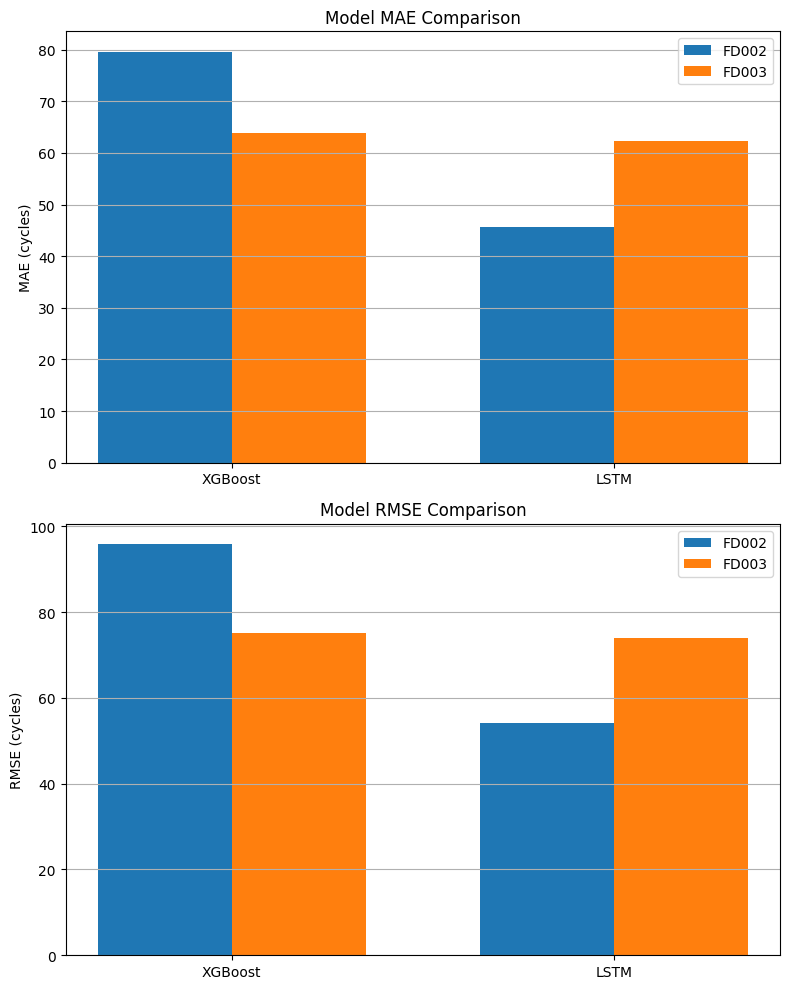

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'LSTM']
fd002_mae = [fd002_mae_xgb, fd002_mae_lstm]
fd003_mae = [mae_xgb_fd003, mae_fd003_lstm]
fd002_rmse = [fd002_rmse_xgb, fd002_rmse_lstm]
fd003_rmse = [rmse_xgb_fd003, rmse_fd003]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE Comparison
axs[0].bar(x - width/2, fd002_mae, width, label='FD002')
axs[0].bar(x + width/2, fd003_mae, width, label='FD003')
axs[0].set_ylabel('MAE (cycles)')
axs[0].set_title('Model MAE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, axis='y')

# RMSE Comparison
axs[1].bar(x - width/2, fd002_rmse, width, label='FD002')
axs[1].bar(x + width/2, fd003_rmse, width, label='FD003')
axs[1].set_ylabel('RMSE (cycles)')
axs[1].set_title('Model RMSE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


## Improving the models by only training it on the cycles that lead to the degradation of the each engine

### testing xgboost on fd002 on half the cycles of each engine

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Reload data
train = pd.read_csv("./CMaps/train_FD002.txt", sep=" ", header=None)
test = pd.read_csv("./CMaps/test_FD002.txt", sep=" ", header=None)
rul = pd.read_csv("./CMaps/RUL_FD002.txt", header=None)
train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

# Scale
features = [col for col in train.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

# Add RUL
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# Filter to degradation phase (last 50% of engine life)
train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)

# Prepare X and y
feature_cols = [col for col in train_degraded.columns if col not in ['id', 'cycle', 'RUL']]
X_train = train_degraded[feature_cols]
y_train = train_degraded['RUL']
X_test = test.groupby('id').nth(-1)[feature_cols]
y_test = rul[0].values

# Train XGBoost
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
fd002_xgb_mae_half = mean_absolute_error(y_test, y_pred)
fd002_xgb_rmse_half = np.sqrt(mean_squared_error(y_test, y_pred))
fd002_xgb_mae_half, fd002_xgb_rmse_half

C:\Users\mamad\AppData\Local\Temp\ipykernel_58224\1882103157.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)


(25.855852127075195, np.float64(37.54575821528895))

### Errors were reduced significantly

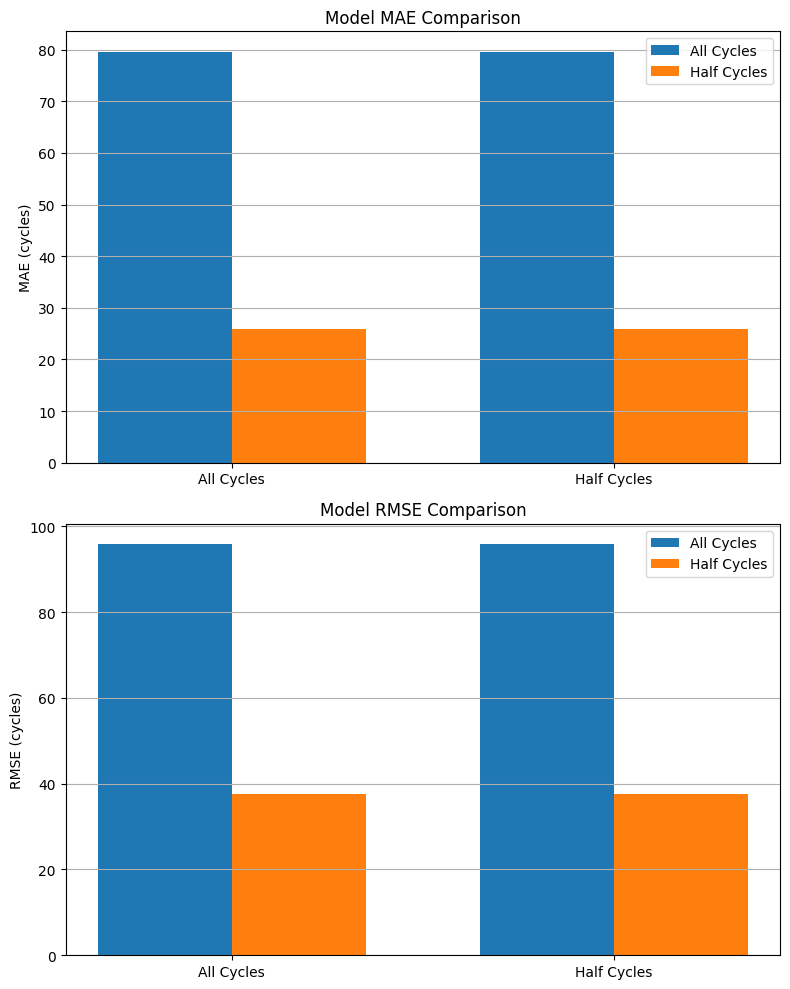

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['All Cycles', 'Half Cycles']
fd002_mae = [fd002_mae_xgb, fd002_xgb_mae_half]
fd002_rmse = [fd002_rmse_xgb, fd002_xgb_rmse_half]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE Comparison
axs[0].bar(x - width/2, fd002_mae_xgb, width, label='All Cycles')
axs[0].bar(x + width/2, fd002_xgb_mae_half, width, label='Half Cycles')
axs[0].set_ylabel('MAE (cycles)')
axs[0].set_title('Model MAE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, axis='y')

# RMSE Comparison
axs[1].bar(x - width/2, fd002_rmse_xgb, width, label='All Cycles')
axs[1].bar(x + width/2, fd002_xgb_rmse_half, width, label='Half Cycles')
axs[1].set_ylabel('RMSE (cycles)')
axs[1].set_title('Model RMSE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

### Testing on FD003 by reducing the training to only the last 50% of the cycles for each engine

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Reload data
train = pd.read_csv("./CMaps/train_FD003.txt", sep=" ", header=None)
test = pd.read_csv("./CMaps/test_FD003.txt", sep=" ", header=None)
rul = pd.read_csv("./CMaps/RUL_FD003.txt", header=None)
train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

# Scale
features = [col for col in train.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

# Add RUL
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# Filter to degradation phase (last 50% of engine life)
train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)

# Prepare X and y
feature_cols = [col for col in train_degraded.columns if col not in ['id', 'cycle', 'RUL']]
X_train = train_degraded[feature_cols]
y_train = train_degraded['RUL']
X_test = test.groupby('id').nth(-1)[feature_cols]
y_test = rul[0].values

# Train XGBoost
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
fd003_xgb_mae_half = mean_absolute_error(y_test, y_pred)
fd003_xgb_rmse_half = np.sqrt(mean_squared_error(y_test, y_pred))
fd003_xgb_mae_half, fd003_xgb_rmse_half

C:\Users\mamad\AppData\Local\Temp\ipykernel_58224\1650612504.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)


(17.670480728149414, np.float64(25.02603136923132))

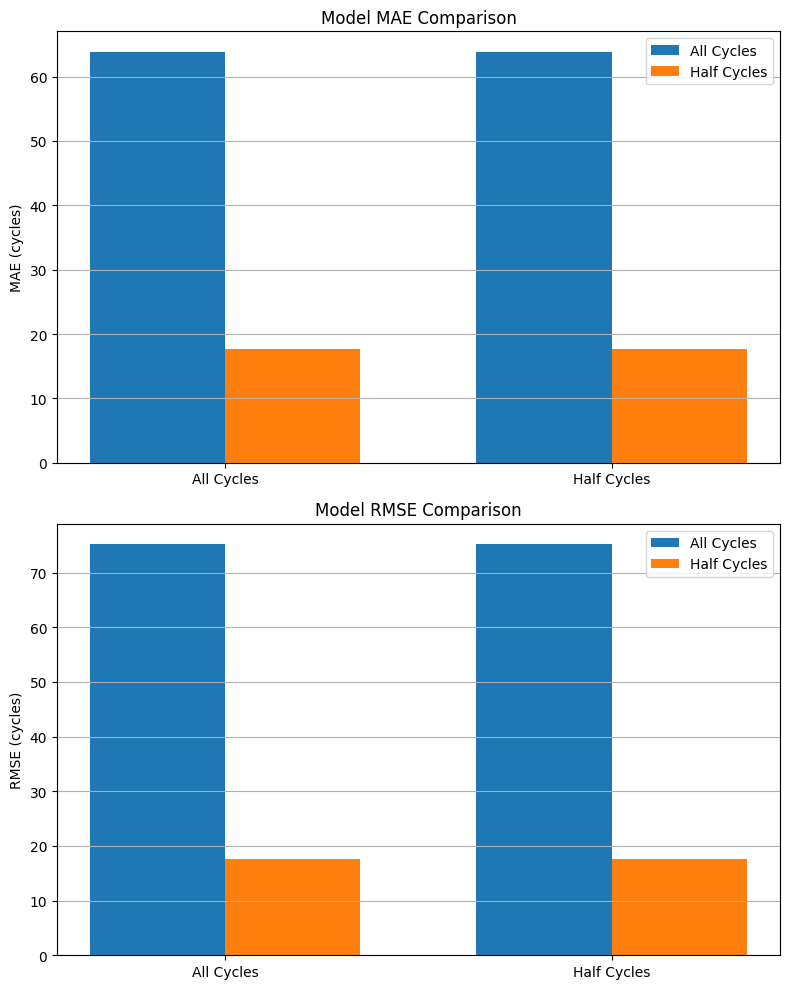

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['All Cycles', 'Half Cycles']
fd003_mae = [mae_xgb_fd003, fd003_xgb_mae_half]
fd003_rmse = [rmse_xgb_fd003, fd003_xgb_mae_half]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE Comparison
axs[0].bar(x - width/2, mae_xgb_fd003, width, label='All Cycles')
axs[0].bar(x + width/2, fd003_xgb_mae_half, width, label='Half Cycles')
axs[0].set_ylabel('MAE (cycles)')
axs[0].set_title('Model MAE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, axis='y')

# RMSE Comparison
axs[1].bar(x - width/2, rmse_xgb_fd003, width, label='All Cycles')
axs[1].bar(x + width/2, fd003_xgb_mae_half, width, label='Half Cycles')
axs[1].set_ylabel('RMSE (cycles)')
axs[1].set_title('Model RMSE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## Now trying to test the hypothesis with LSTM on FD002

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Redefine function to create sequences
def create_sequences(df, window_size, feature_cols, target_col='RUL'):
    X, y = [], []
    for eid in df['id'].unique():
        edf = df[df['id'] == eid].sort_values('cycle')
        data = edf[feature_cols].values
        target = edf[target_col].values
        for i in range(len(edf) - window_size + 1):
            X.append(data[i:i + window_size])
            y.append(target[i + window_size - 1])
    return np.array(X), np.array(y)

# Reload FD002 to apply same preprocessing with degradation filter for LSTM
train = pd.read_csv("./CMaps/train_FD002.txt", sep=" ", header=None)
test = pd.read_csv("./CMaps/test_FD002.txt", sep=" ", header=None)
rul = pd.read_csv("./CMaps/RUL_FD002.txt", header=None)
train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

features = [col for col in train.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

train['cycle_norm'] = train.groupby('id')['cycle'].transform(lambda x: x / x.max())
test['cycle_norm'] = test.groupby('id')['cycle'].transform(lambda x: x / x.max())

key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']
def add_features(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

train = add_features(train)
test = add_features(test)
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# Degradation-phase training data only
train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)

# Prepare LSTM sequences
lstm_features = [c for c in train.columns if c not in ['id', 'cycle', 'RUL']]
X_train_seq, y_train_seq = create_sequences(train_degraded, 30, lstm_features)
X_test_seq = []
for eid in test['id'].unique():
    edf = test[test['id'] == eid].sort_values('cycle')
    data = edf[lstm_features].values
    if len(data) >= 30:
        X_test_seq.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_seq.append(np.vstack([pad, data]))
X_test_seq = np.array(X_test_seq)
y_test_seq = rul[0].values

# Define and train LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_seq, y_train_seq, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stop], verbose=2)

# Predict and evaluate
y_pred = model.predict(X_test_seq).flatten()
fd002_lstm_mae_half = mean_absolute_error(y_test_seq, y_pred)
fd002_lstm_rmse_half = np.sqrt(mean_squared_error(y_test_seq, y_pred))
fd002_lstm_mae_half, fd002_lstm_rmse_half


C:\Users\mamad\AppData\Local\Temp\ipykernel_58224\382193135.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)


Epoch 1/50


c:\Users\mamad\UMD\MSML 651 Big Data Analytics\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 4s - 21ms/step - loss: 1869.6738 - mae: 33.4645 - val_loss: 1180.0348 - val_mae: 26.7647
Epoch 2/50
187/187 - 2s - 12ms/step - loss: 1473.1628 - mae: 28.9254 - val_loss: 943.7360 - val_mae: 23.8157
Epoch 3/50
187/187 - 2s - 12ms/step - loss: 1243.5043 - mae: 26.4378 - val_loss: 790.2241 - val_mae: 21.9833
Epoch 4/50
187/187 - 2s - 12ms/step - loss: 1085.0312 - mae: 24.8082 - val_loss: 694.0483 - val_mae: 20.9119
Epoch 5/50
187/187 - 2s - 12ms/step - loss: 981.1658 - mae: 23.8383 - val_loss: 640.0054 - val_mae: 20.3866
Epoch 6/50
187/187 - 2s - 12ms/step - loss: 917.9604 - mae: 23.3431 - val_loss: 612.8842 - val_mae: 20.1985
Epoch 7/50
187/187 - 2s - 12ms/step - loss: 880.8065 - mae: 23.1042 - val_loss: 602.8057 - val_mae: 20.2126
Epoch 8/50
187/187 - 2s - 12ms/step - loss: 861.4969 - mae: 23.0385 - val_loss: 601.7322 - val_mae: 20.3109
Epoch 9/50
187/187 - 2s - 13ms/step - loss: 853.3305 - mae: 23.0712 - val_loss: 604.1467 - val_mae: 20.4221
Epoch 10/50
187/187 - 2s - 13ms/st

(55.13922119140625, np.float64(69.01511383385527))

# Comparing model errors trained on all cycles vs half the cycles on FD002 dataset 

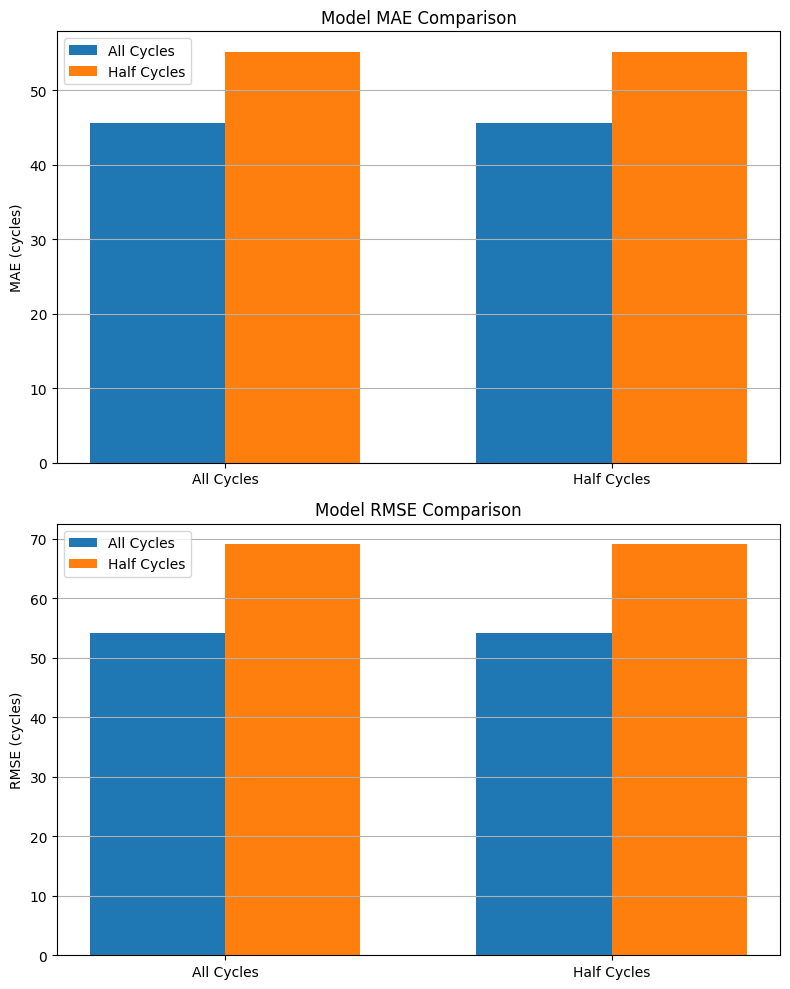

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['All Cycles', 'Half Cycles']
fd002_mae = [fd002_mae_lstm, fd002_lstm_mae_half]
fd002_rmse = [fd002_rmse_lstm, fd002_lstm_rmse_half]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE Comparison
axs[0].bar(x - width/2, fd002_mae_lstm, width, label='All Cycles')
axs[0].bar(x + width/2, fd002_lstm_mae_half, width, label='Half Cycles')
axs[0].set_ylabel('MAE (cycles)')
axs[0].set_title('Model MAE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, axis='y')

# RMSE Comparison
axs[1].bar(x - width/2, fd002_rmse_lstm, width, label='All Cycles')
axs[1].bar(x + width/2, fd002_lstm_rmse_half, width, label='Half Cycles')
axs[1].set_ylabel('RMSE (cycles)')
axs[1].set_title('Model RMSE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

# Training LSTM on half cycle for FD003 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Redefine function to create sequences
def create_sequences(df, window_size, feature_cols, target_col='RUL'):
    X, y = [], []
    for eid in df['id'].unique():
        edf = df[df['id'] == eid].sort_values('cycle')
        data = edf[feature_cols].values
        target = edf[target_col].values
        for i in range(len(edf) - window_size + 1):
            X.append(data[i:i + window_size])
            y.append(target[i + window_size - 1])
    return np.array(X), np.array(y)

# Reload FD002 to apply same preprocessing with degradation filter for LSTM
train = pd.read_csv("./CMAps/train_FD003.txt", sep=" ", header=None)
test = pd.read_csv("./CMAps/test_FD003.txt", sep=" ", header=None)
rul = pd.read_csv("./CMAps/RUL_FD003.txt", header=None)
train.dropna(axis=1, how='all', inplace=True)
test.dropna(axis=1, how='all', inplace=True)
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f's{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns
train.drop(columns=['s16'], inplace=True)
test.drop(columns=['s16'], inplace=True)

features = [col for col in train.columns if col not in ['id', 'cycle']]
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

train['cycle_norm'] = train.groupby('id')['cycle'].transform(lambda x: x / x.max())
test['cycle_norm'] = test.groupby('id')['cycle'].transform(lambda x: x / x.max())

key_sensors = ['s2', 's3', 's4', 's7', 's9', 's11', 's12', 's14', 's17', 's20', 's21']
def add_features(df):
    for sensor in key_sensors:
        df[f'{sensor}_rolling_mean'] = df.groupby('id')[sensor].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
        df[f'{sensor}_rolling_std'] = df.groupby('id')[sensor].rolling(5, min_periods=1).std().reset_index(0, drop=True).fillna(0)
        df[f'{sensor}_delta'] = df.groupby('id')[sensor].diff().fillna(0)
    return df

train = add_features(train)
test = add_features(test)
train['RUL'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# Degradation-phase training data only
train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)

# Prepare LSTM sequences
lstm_features = [c for c in train.columns if c not in ['id', 'cycle', 'RUL']]
X_train_seq, y_train_seq = create_sequences(train_degraded, 30, lstm_features)
X_test_seq = []
for eid in test['id'].unique():
    edf = test[test['id'] == eid].sort_values('cycle')
    data = edf[lstm_features].values
    if len(data) >= 30:
        X_test_seq.append(data[-30:])
    else:
        pad = np.zeros((30 - len(data), data.shape[1]))
        X_test_seq.append(np.vstack([pad, data]))
X_test_seq = np.array(X_test_seq)
y_test_seq = rul[0].values

# Define and train LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_seq, y_train_seq, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stop], verbose=2)

# Predict and evaluate
y_pred = model.predict(X_test_seq).flatten()
fd003_lstm_mae_half = mean_absolute_error(y_test_seq, y_pred)
fd003_lstm_rmse_half = np.sqrt(mean_squared_error(y_test_seq, y_pred))
fd003_lstm_mae_half, fd003_lstm_rmse_half


C:\Users\mamad\AppData\Local\Temp\ipykernel_58224\1379830862.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_degraded = train.groupby('id').apply(lambda df: df[df['cycle'] > 0.5 * df['cycle'].max()]).reset_index(drop=True)


Epoch 1/50


c:\Users\mamad\UMD\MSML 651 Big Data Analytics\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 - 6s - 52ms/step - loss: 4308.8179 - mae: 49.2531 - val_loss: 4288.5591 - val_mae: 48.8444
Epoch 2/50
119/119 - 3s - 22ms/step - loss: 3827.5762 - mae: 45.1862 - val_loss: 3930.6047 - val_mae: 46.0346
Epoch 3/50
119/119 - 3s - 22ms/step - loss: 3518.5078 - mae: 42.6794 - val_loss: 3627.2346 - val_mae: 43.7292
Epoch 4/50
119/119 - 3s - 22ms/step - loss: 3256.0405 - mae: 40.5904 - val_loss: 3365.5977 - val_mae: 41.8079
Epoch 5/50
119/119 - 3s - 23ms/step - loss: 3022.8960 - mae: 38.8138 - val_loss: 3140.4854 - val_mae: 40.2276
Epoch 6/50
119/119 - 3s - 22ms/step - loss: 2833.0845 - mae: 37.4044 - val_loss: 2946.3928 - val_mae: 38.9317
Epoch 7/50
119/119 - 3s - 24ms/step - loss: 2666.6648 - mae: 36.2378 - val_loss: 2780.9307 - val_mae: 37.8923
Epoch 8/50
119/119 - 3s - 24ms/step - loss: 2520.8340 - mae: 35.2447 - val_loss: 2640.4937 - val_mae: 37.0743
Epoch 9/50
119/119 - 3s - 24ms/step - loss: 2405.4570 - mae: 34.5792 - val_loss: 2523.8823 - val_mae: 36.4594
Epoch 10/50
119/119 -

(31.889490127563477, np.float64(43.82141910596846))

# Evaluation of LSTM Model on all cycles vs half cycles for FD003

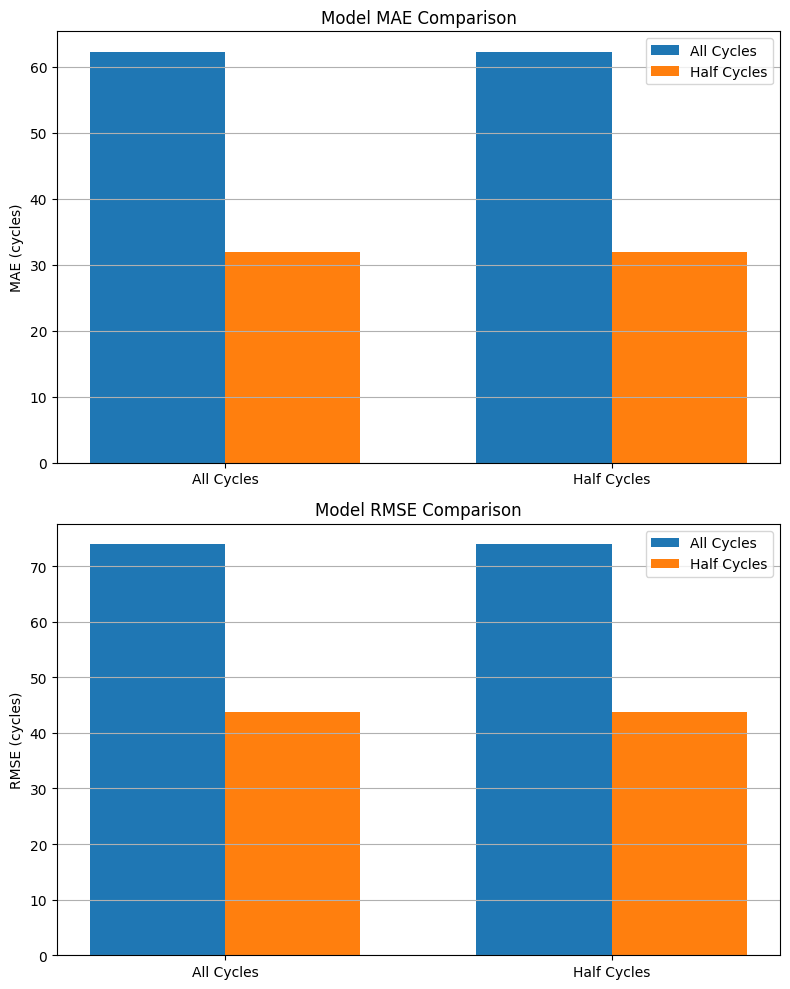

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['All Cycles', 'Half Cycles']
fd003_mae = [mae_fd003_lstm, fd003_lstm_mae_half]
fd003_rmse = [rmse_fd003_lstm, fd003_lstm_rmse_half]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE Comparison
axs[0].bar(x - width/2, mae_fd003_lstm, width, label='All Cycles')
axs[0].bar(x + width/2, fd003_lstm_mae_half, width, label='Half Cycles')
axs[0].set_ylabel('MAE (cycles)')
axs[0].set_title('Model MAE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, axis='y')

# RMSE Comparison
axs[1].bar(x - width/2, rmse_fd003_lstm, width, label='All Cycles')
axs[1].bar(x + width/2, fd003_lstm_rmse_half, width, label='Half Cycles')
axs[1].set_ylabel('RMSE (cycles)')
axs[1].set_title('Model RMSE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()